In [222]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/housing/anscombe.csv
/kaggle/input/housing/housing.csv


In [223]:
anscombe = pd.read_csv("/kaggle/input/housing/anscombe.csv")
data = pd.read_csv("/kaggle/input/housing/housing.csv")

In [224]:
data

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY
...,...,...,...,...,...,...,...,...,...,...
20635,-121.09,39.48,25.0,1665.0,374.0,845.0,330.0,1.5603,78100.0,INLAND
20636,-121.21,39.49,18.0,697.0,150.0,356.0,114.0,2.5568,77100.0,INLAND
20637,-121.22,39.43,17.0,2254.0,485.0,1007.0,433.0,1.7000,92300.0,INLAND
20638,-121.32,39.43,18.0,1860.0,409.0,741.0,349.0,1.8672,84700.0,INLAND


In [225]:
data.columns

Index(['longitude', 'latitude', 'housing_median_age', 'total_rooms',
       'total_bedrooms', 'population', 'households', 'median_income',
       'median_house_value', 'ocean_proximity'],
      dtype='object')

veri seti semtlere göre ayrılmış vaziyette ve semtteki binaların ortalama değerlerini yansıtıyor.

<AxesSubplot:xlabel='longitude', ylabel='latitude'>

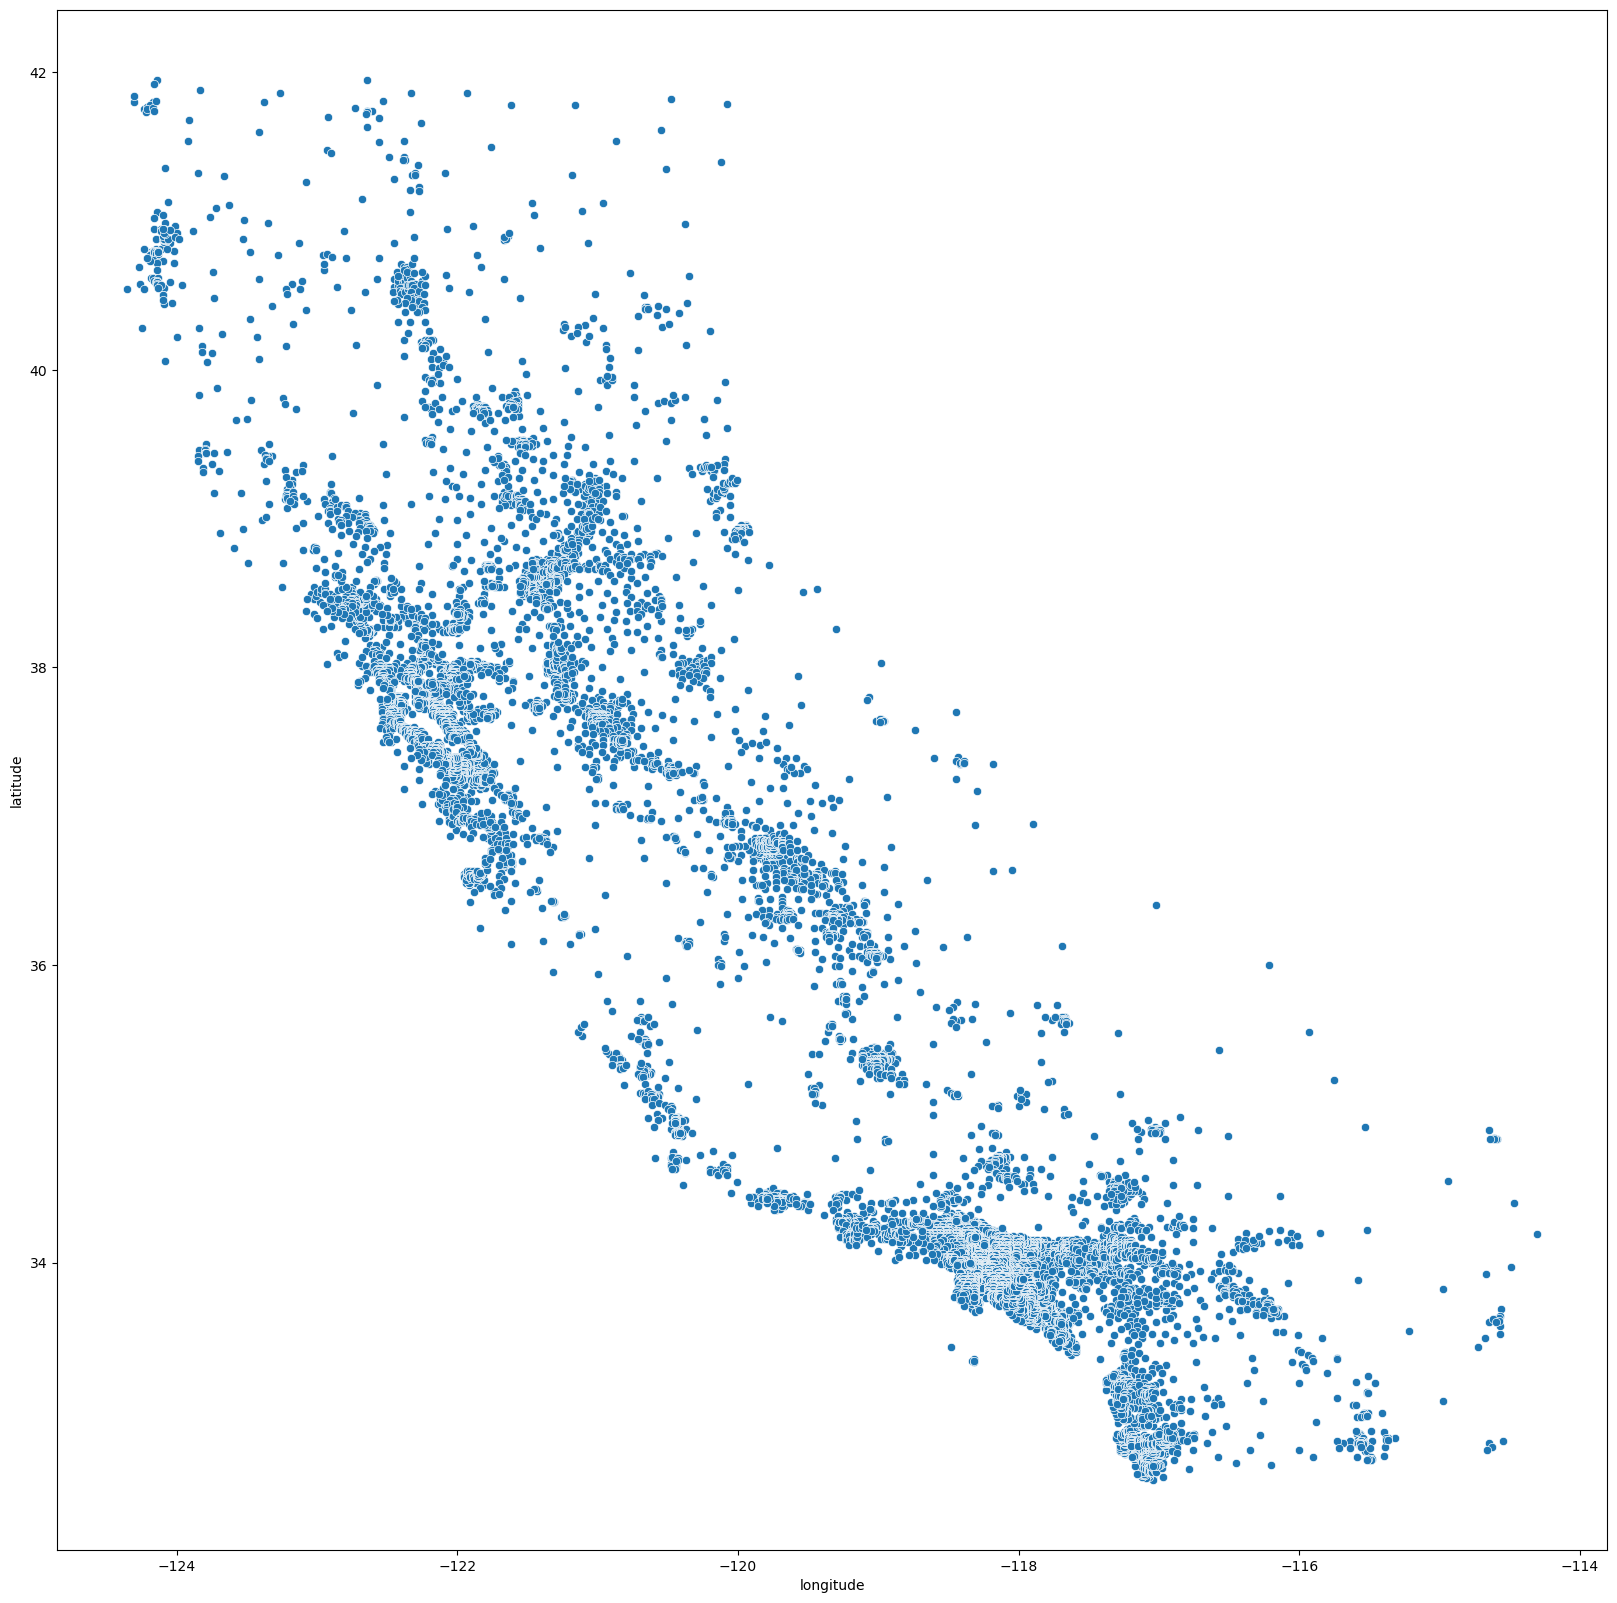

In [226]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(20, 20))
sns.scatterplot(data=data, x='longitude', y='latitude')

In [227]:
data.isna().sum()

longitude               0
latitude                0
housing_median_age      0
total_rooms             0
total_bedrooms        207
population              0
households              0
median_income           0
median_house_value      0
ocean_proximity         0
dtype: int64

In [228]:
data["ocean_proximity"].value_counts()

<1H OCEAN     9136
INLAND        6551
NEAR OCEAN    2658
NEAR BAY      2290
ISLAND           5
Name: ocean_proximity, dtype: int64

In [229]:
data.loc[data["ocean_proximity"]=="ISLAND"].isna().sum() # nan değer yok

longitude             0
latitude              0
housing_median_age    0
total_rooms           0
total_bedrooms        0
population            0
households            0
median_income         0
median_house_value    0
ocean_proximity       0
dtype: int64

In [230]:
data.loc[data["ocean_proximity"]=="NEAR BAY"].isna().sum() # nan değer var, dolduralım

longitude              0
latitude               0
housing_median_age     0
total_rooms            0
total_bedrooms        20
population             0
households             0
median_income          0
median_house_value     0
ocean_proximity        0
dtype: int64

In [231]:
data[data["ocean_proximity"]=="NEAR OCEAN"].isna().sum()

longitude              0
latitude               0
housing_median_age     0
total_rooms            0
total_bedrooms        30
population             0
households             0
median_income          0
median_house_value     0
ocean_proximity        0
dtype: int64

In [232]:
data[data["ocean_proximity"]=="INLAND"].isna().sum()

longitude              0
latitude               0
housing_median_age     0
total_rooms            0
total_bedrooms        55
population             0
households             0
median_income          0
median_house_value     0
ocean_proximity        0
dtype: int64

In [233]:
data[data["ocean_proximity"]=="<1H OCEAN"].isna().sum()

longitude               0
latitude                0
housing_median_age      0
total_rooms             0
total_bedrooms        102
population              0
households              0
median_income           0
median_house_value      0
ocean_proximity         0
dtype: int64

In [234]:
NEARBAY = data[data["ocean_proximity"]=="NEAR BAY"]
NEAROCEAN = data[data["ocean_proximity"]=="NEAR OCEAN"]
INLAND = data[data["ocean_proximity"]=="INLAND"]
HOCEAN = data[data["ocean_proximity"]=="<1H OCEAN"]

NEARBAY[NEARBAY.isna().any(axis=1)]

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
290,-122.16,37.77,47.0,1256.0,NaN,570.0,218.0,4.3750,161900.0,NEAR BAY
341,-122.17,37.75,38.0,992.0,NaN,732.0,259.0,1.6196,85100.0,NEAR BAY
538,-122.28,37.78,29.0,5154.0,NaN,3741.0,1273.0,2.5762,173400.0,NEAR BAY
563,-122.24,37.75,45.0,891.0,NaN,384.0,146.0,4.9489,247100.0,NEAR BAY
696,-122.10,37.69,41.0,746.0,NaN,387.0,161.0,3.9063,178400.0,NEAR BAY
738,-122.14,37.67,37.0,3342.0,NaN,1635.0,557.0,4.7933,186900.0,NEAR BAY
1493,-122.01,37.94,23.0,3741.0,NaN,1339.0,499.0,6.7061,322300.0,NEAR BAY
1606,-122.08,37.88,26.0,2947.0,NaN,825.0,626.0,2.9330,85000.0,NEAR BAY
9942,-122.23,38.17,45.0,350.0,NaN,225.0,72.0,1.8942,216700.0,NEAR BAY
15663,-122.44,37.80,52.0,3830.0,NaN,1310.0,963.0,3.4801,500001.0,NEAR BAY


en yakın koordinattaki evlerin ortalamasına göre dolduracağım. fakat bundan önce en yakın koordinatlardaki aykırı değer ayıklamalarını yapmam lazım.

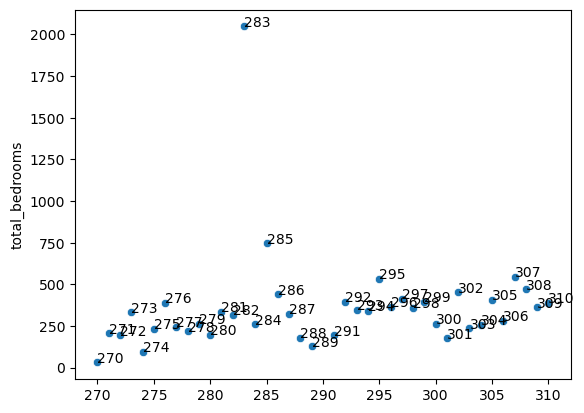

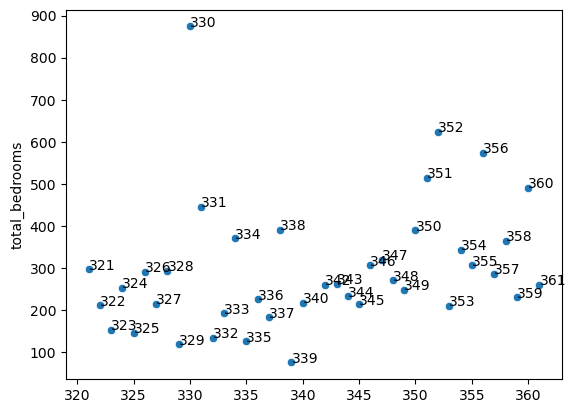

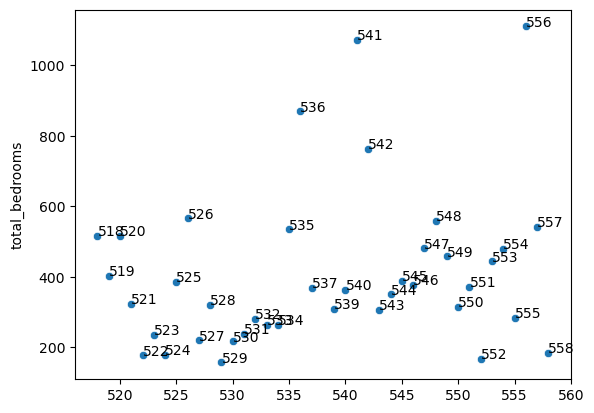

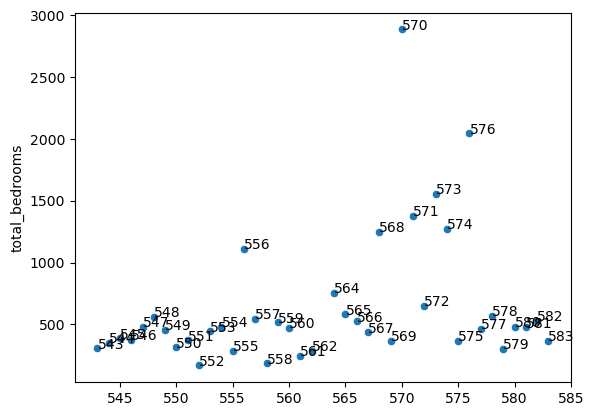

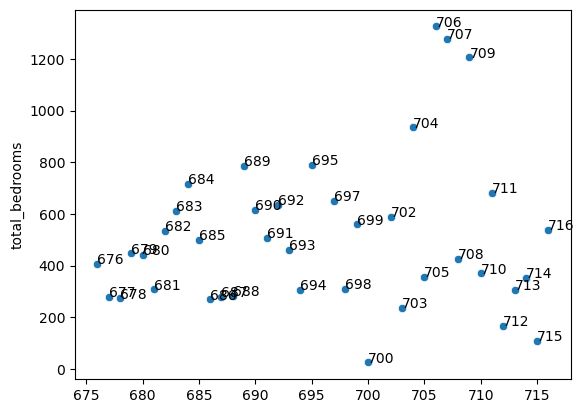

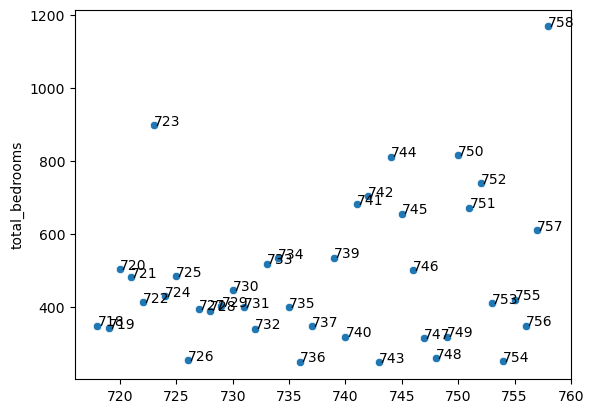

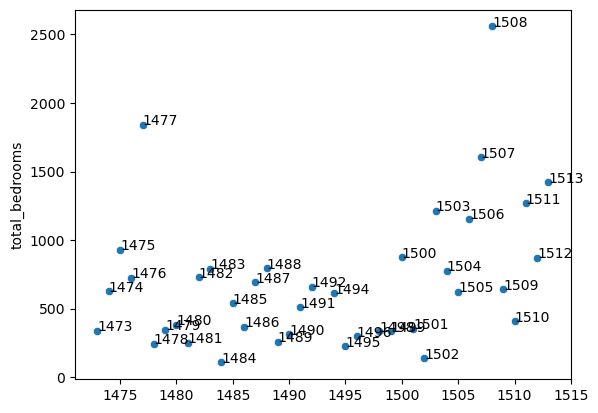

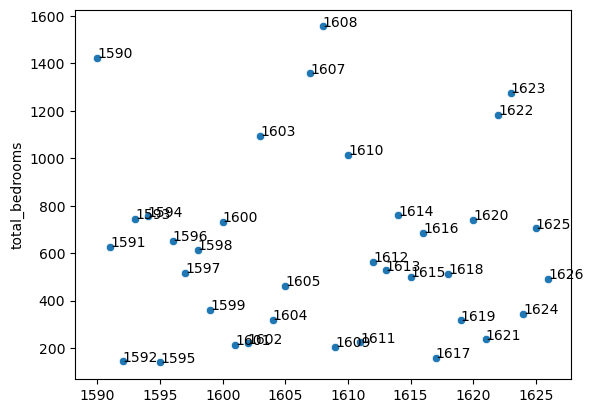

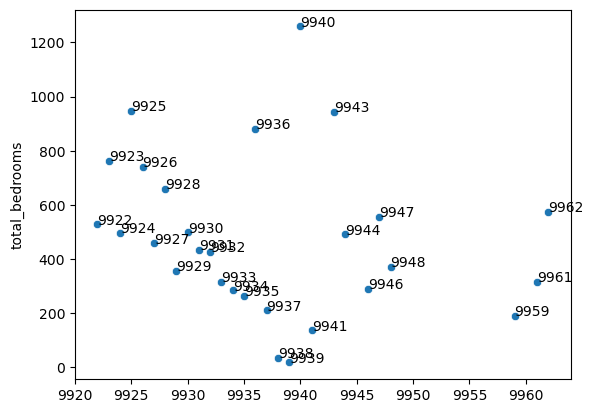

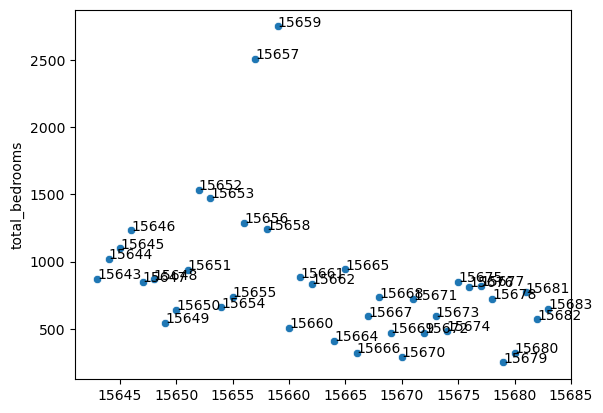

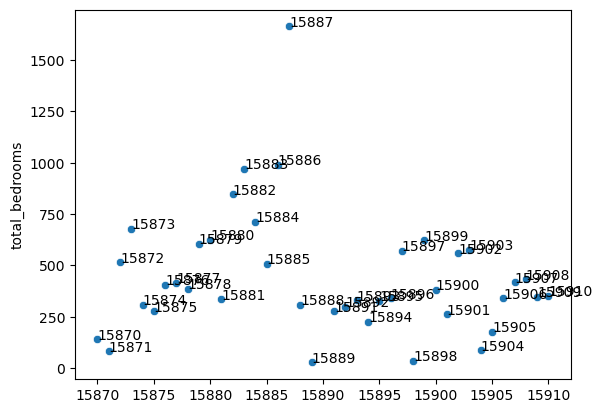

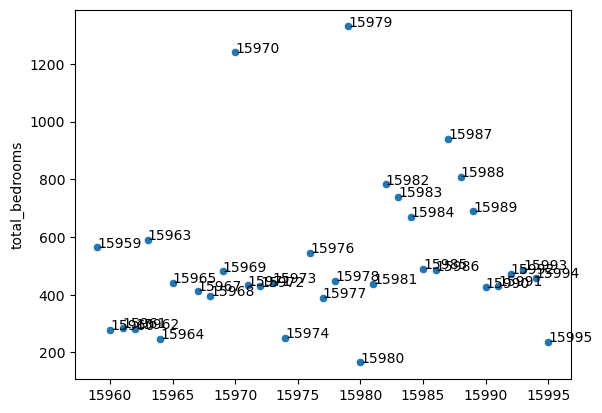

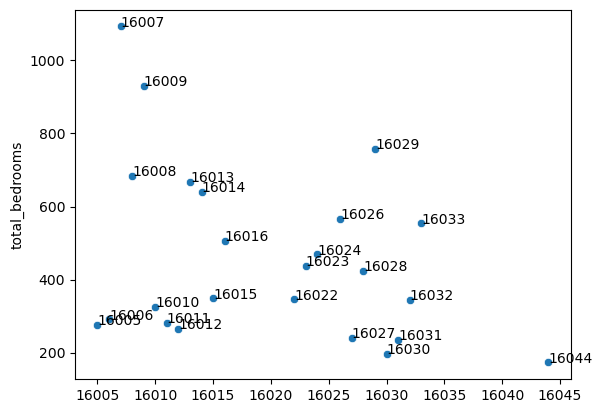

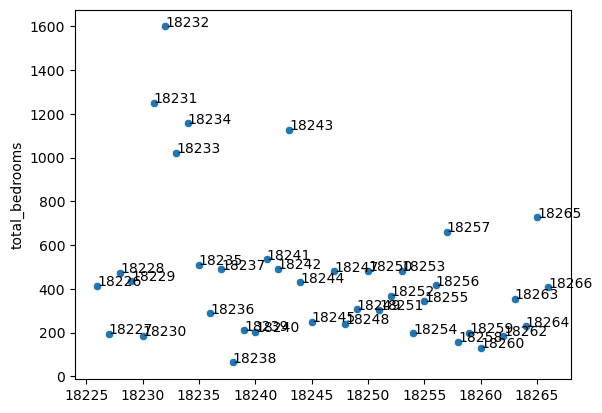

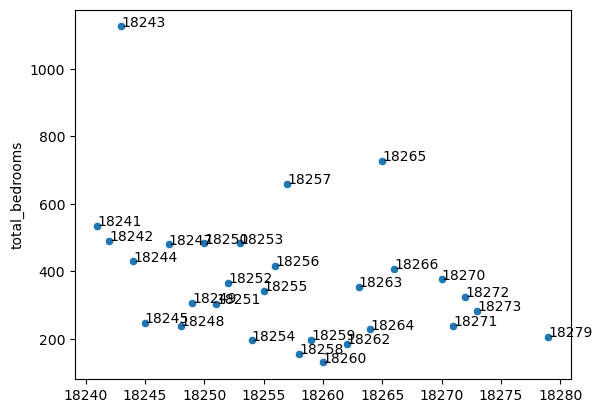

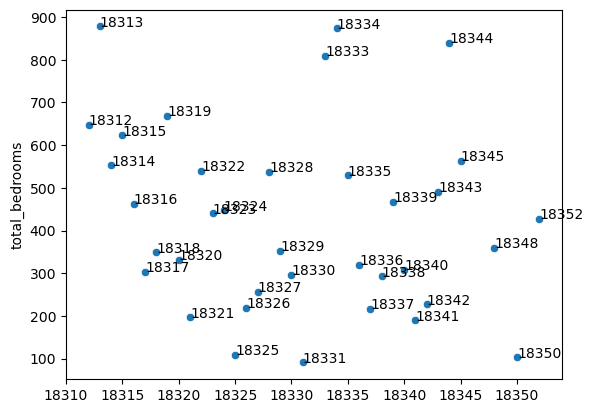

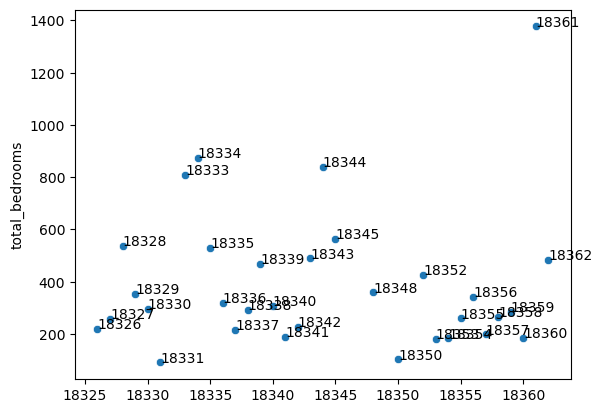

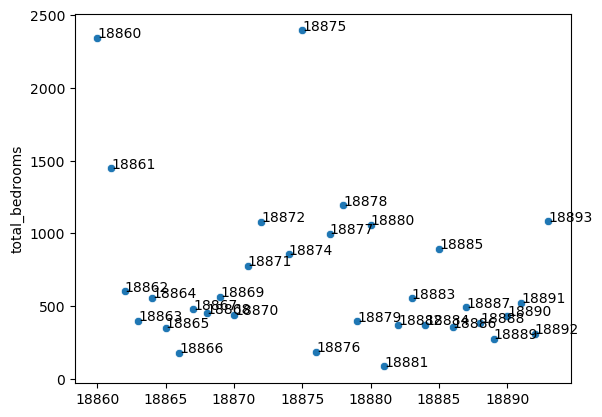

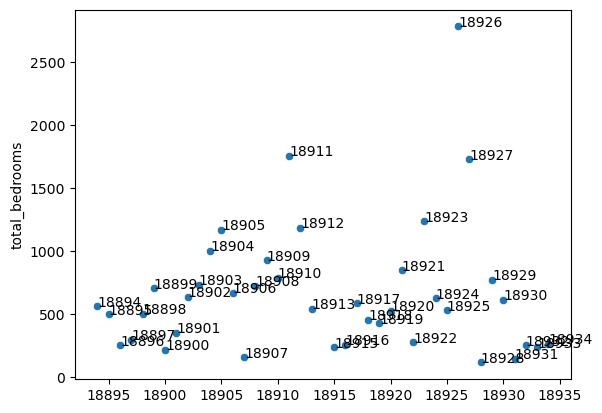

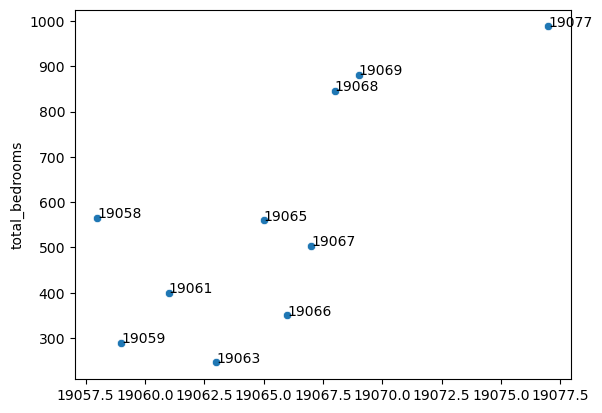

In [235]:
for indeks in NEARBAY[NEARBAY.isna().any(axis=1)].index:
    fig, ax = plt.subplots()
    ax = sns.scatterplot(data=NEARBAY.loc[(indeks - 20):(indeks + 20)], x=NEARBAY.loc[(indeks - 20):(indeks + 20)].index, y="total_bedrooms") 

    for i, row in NEARBAY.loc[(indeks - 20):(indeks + 20)].iterrows():
        if row["total_bedrooms"] > 1:
            ax.text(i, row["total_bedrooms"], i)


#buradan manuel olarak elle de çıkartabiliriz fakat istatistikler metodları kullanmamız daha sağlıklı olur.

In [236]:
NEARBAY_imputed = NEARBAY.copy()


for indeks in NEARBAY[NEARBAY.isna().any(axis=1)].index:
    species_specialized_std = NEARBAY_imputed[(indeks - 20):(indeks + 20)]["total_bedrooms"].std()
    species_specialized_mean = NEARBAY_imputed[(indeks - 20):(indeks + 20)]["total_bedrooms"].mean()
    threestd_plus = species_specialized_mean + (3 * species_specialized_std)
    threestd_minus = species_specialized_mean - (3 * species_specialized_std)
    aykiri_degerler = NEARBAY_imputed[(indeks - 20):(indeks + 20)][(NEARBAY_imputed[(indeks - 20):(indeks + 20)]["total_bedrooms"] > threestd_plus) | (NEARBAY_imputed[(indeks - 20):(indeks + 20)]["total_bedrooms"] < threestd_minus)].index
    aykiri_degerler
    NEARBAY_imputed.drop(index=aykiri_degerler, inplace=True)

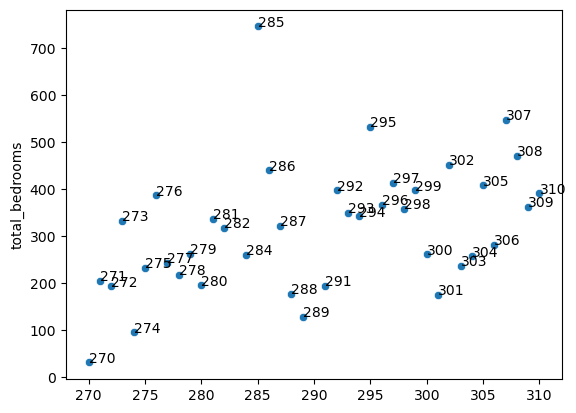

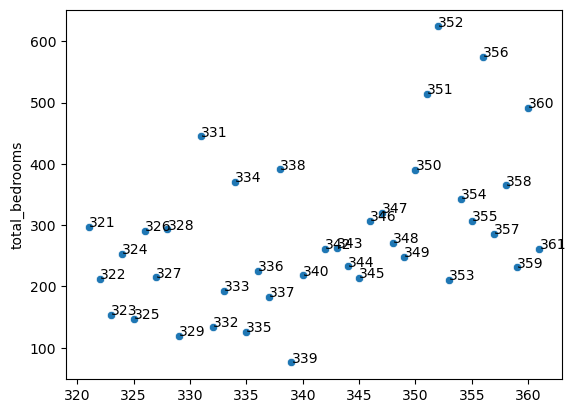

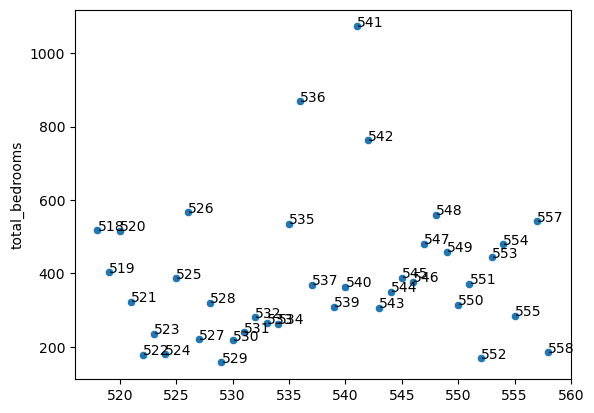

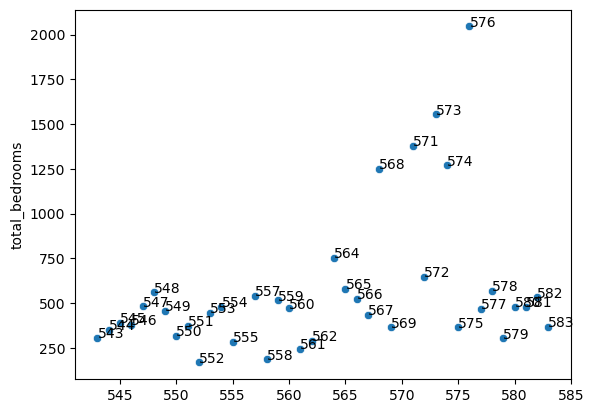

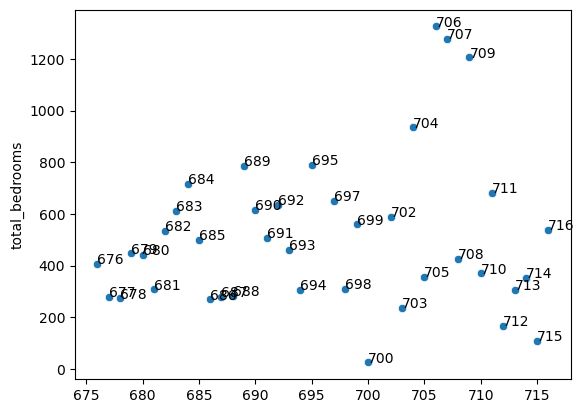

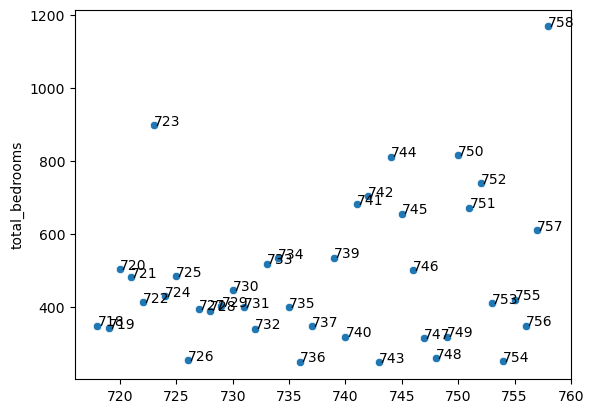

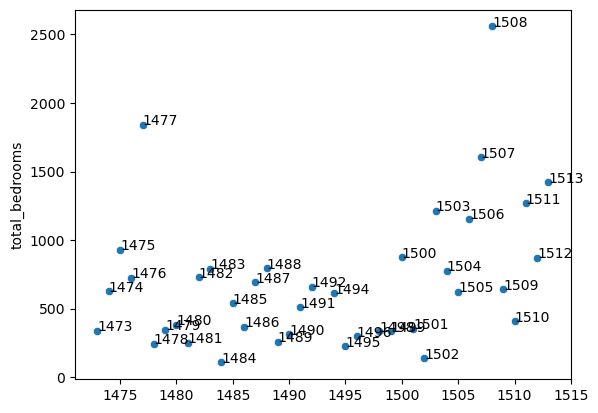

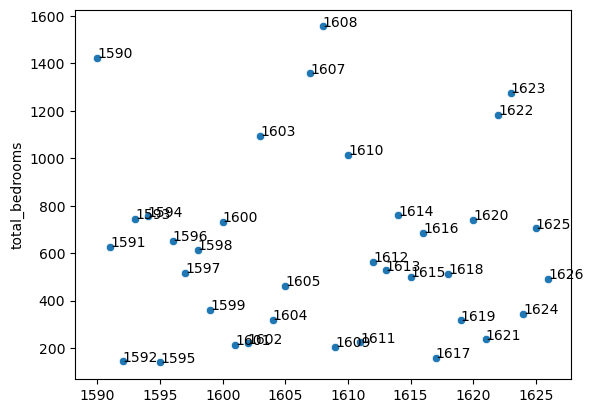

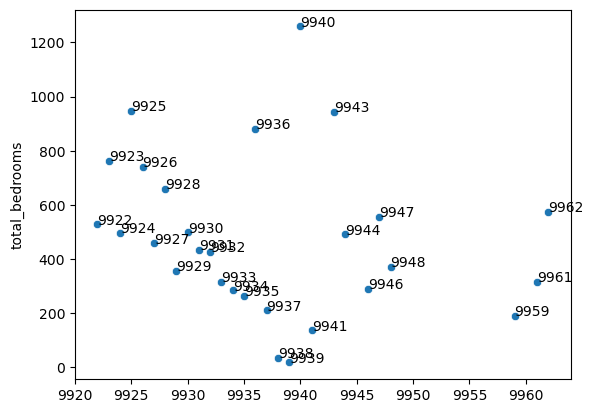

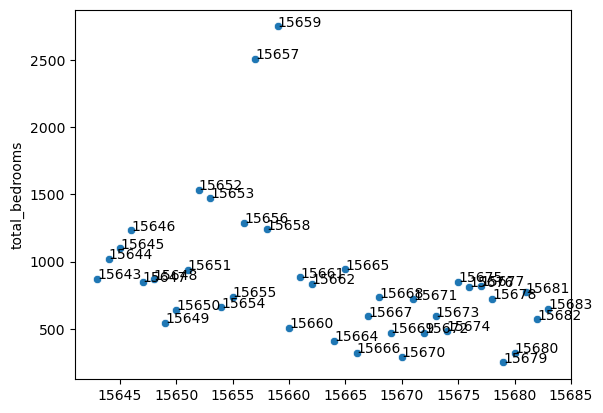

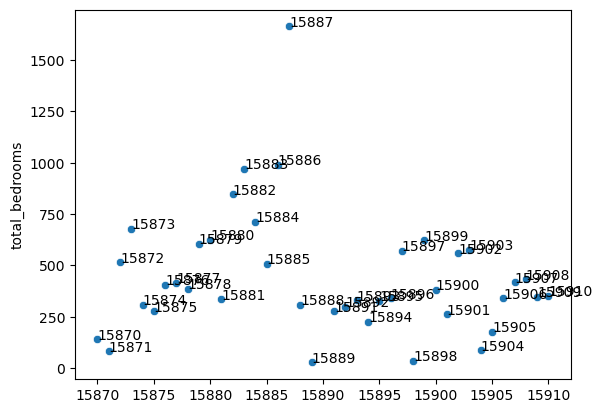

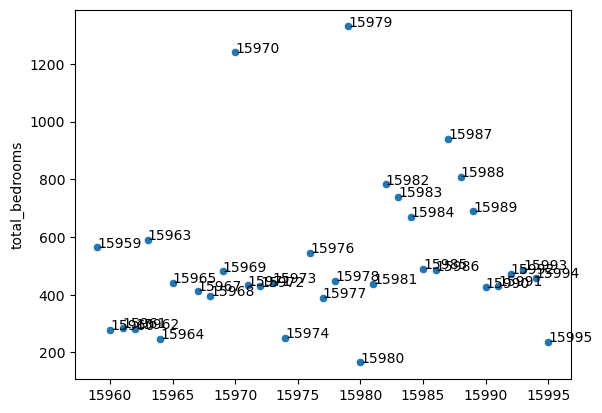

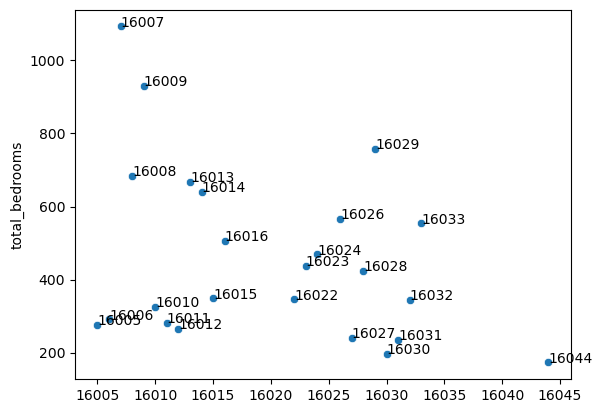

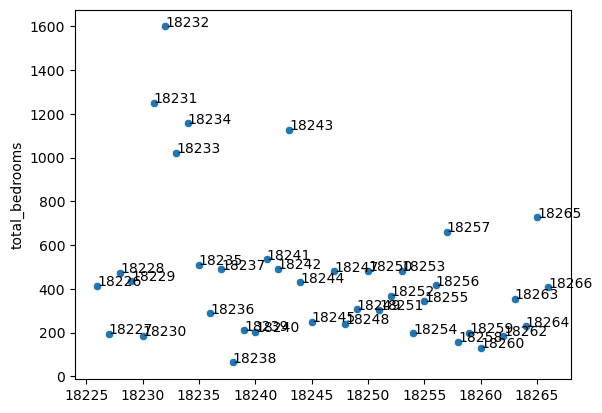

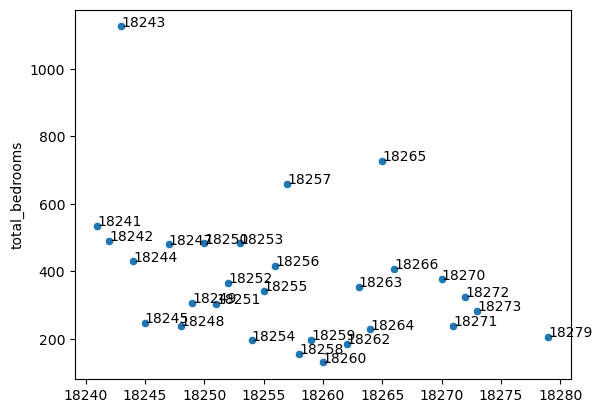

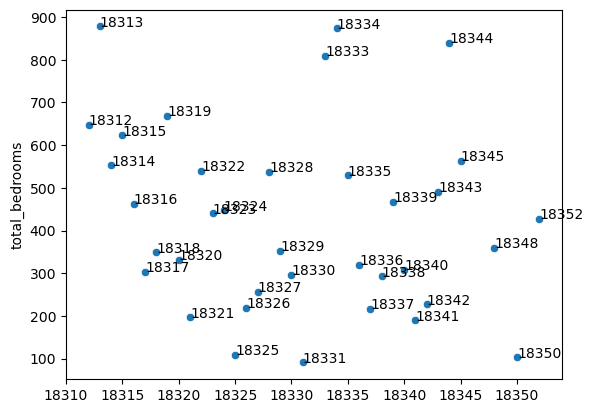

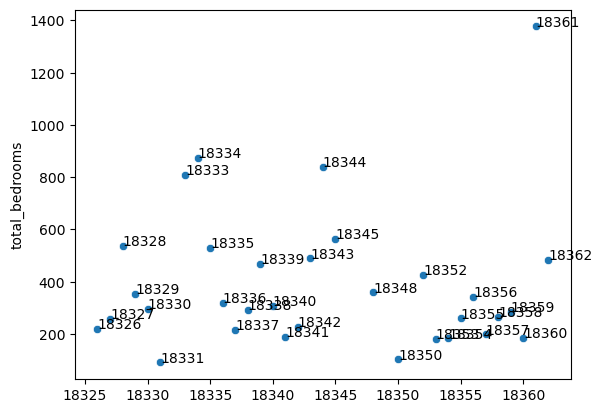

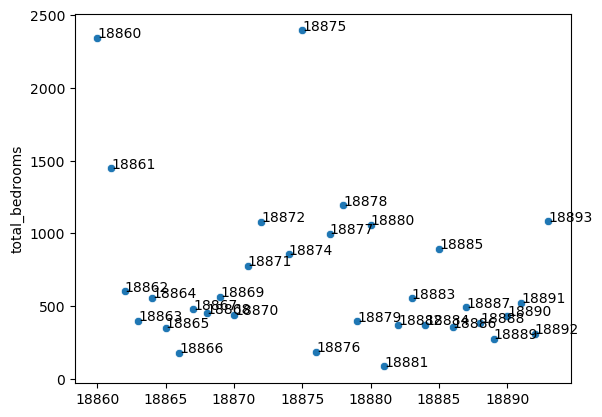

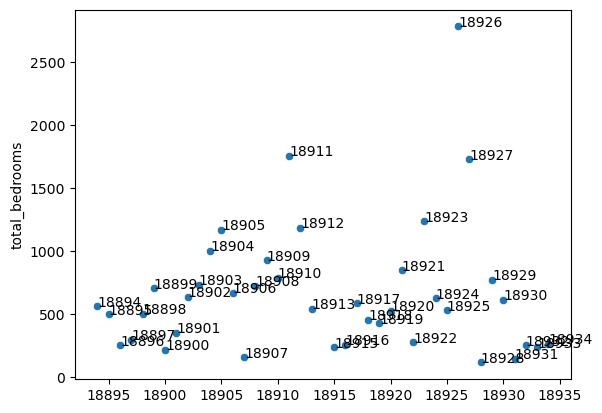

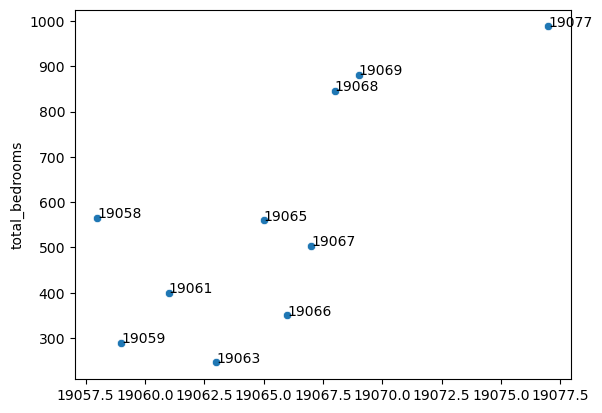

In [237]:
for indeks in NEARBAY[NEARBAY.isna().any(axis=1)].index:
    fig, ax = plt.subplots()
    ax = sns.scatterplot(data=NEARBAY_imputed.loc[(indeks - 20):(indeks + 20)], x=NEARBAY_imputed.loc[(indeks - 20):(indeks + 20)].index, y="total_bedrooms") 

    for i, row in NEARBAY_imputed.loc[(indeks - 20):(indeks + 20)].iterrows():
        if row["total_bedrooms"] > 1:
            ax.text(i, row["total_bedrooms"], i)
        
#istatistiksel olarak 3 sigma yöntemiyle aykırı değerler atıldı.

In [238]:
from sklearn.neighbors import NearestNeighbors
import numpy as np


# Veri setindeki NaN değerlerin yerini belirleyin
nan_indices = NEARBAY_imputed['total_bedrooms'].isnull()

# X verisi olarak sadece latitude ve longitude sütunlarını alın
X = NEARBAY_imputed[['longitude', 'latitude']].values

# KNN modelini oluşturun ve verilere fit edin
knn = NearestNeighbors(n_neighbors=20, metric='manhattan')
knn.fit(X)

# NaN değerleri doldurun
for i, nan_index in enumerate(nan_indices):
    if nan_index:
        # NaN değerine sahip satırın konumunu belirleyin
        row_index = NEARBAY_imputed.index[i]
        row = NEARBAY_imputed.loc[row_index, ['longitude', 'latitude']].values.reshape(1, -1)

        # Bu satıra en yakın 20 komşunun konumunu ve total_bedrooms değerlerini belirleyin
        distances, indices = knn.kneighbors(row)
        neighbors = NEARBAY_imputed.iloc[indices[0], :]['total_bedrooms'].dropna()

        # En yakın komşuların total_bedrooms değerlerinin ortalamasını alarak NaN değerini doldurun
        if len(neighbors) > 0:
            NEARBAY_imputed.loc[row_index, 'total_bedrooms'] = np.mean(neighbors).round()


NearestNeighbors sklearn sınıfı, bir veri kümesindeki her bir örneğin en yakın komşularını bulmak için kullanılır. Bu sınıf, fit metodu ile eğitilir ve ardından bir örnek kümesi içindeki her bir örneğin k-nn (k en yakın komşu) sınıflandırmasını veya regresyon tahminini yapmak için kneighbors veya kneighbors_graph metodları kullanılır.

In [239]:
NEARBAY_imputed.loc[280:300] #hatırlarsak 290.indeximiz nandı, görüldüğü üzere en yakın komşulara göre tespit edilmiş. 
#aykırı değerler gittiği için çok daha sağlıklı bir tespit

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
280,-122.18,37.80,34.0,1355.0,195.0,442.0,195.0,6.2838,318200.0,NEAR BAY
281,-122.18,37.80,23.0,2317.0,336.0,955.0,328.0,6.7527,285800.0,NEAR BAY
282,-122.13,37.77,24.0,2459.0,317.0,916.0,324.0,7.0712,293000.0,NEAR BAY
284,-122.17,37.78,42.0,1524.0,260.0,651.0,267.0,3.6875,157300.0,NEAR BAY
285,-122.17,37.77,30.0,3326.0,746.0,1704.0,703.0,2.8750,135300.0,NEAR BAY
286,-122.18,37.78,43.0,1985.0,440.0,1085.0,407.0,3.4205,136700.0,NEAR BAY
287,-122.18,37.78,50.0,1642.0,322.0,713.0,284.0,3.2984,160700.0,NEAR BAY
288,-122.17,37.78,49.0,893.0,177.0,468.0,181.0,3.8750,140600.0,NEAR BAY
289,-122.17,37.78,52.0,653.0,128.0,296.0,121.0,4.1750,144000.0,NEAR BAY
290,-122.16,37.77,47.0,1256.0,360.0,570.0,218.0,4.3750,161900.0,NEAR BAY


In [240]:
NEARBAY_imputed.loc[NEARBAY[NEARBAY.isna().any(axis=1)].index] # bütün değerlerimiz tespit edilmiş.

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
290,-122.16,37.77,47.0,1256.0,360.0,570.0,218.0,4.3750,161900.0,NEAR BAY
341,-122.17,37.75,38.0,992.0,279.0,732.0,259.0,1.6196,85100.0,NEAR BAY
538,-122.28,37.78,29.0,5154.0,377.0,3741.0,1273.0,2.5762,173400.0,NEAR BAY
563,-122.24,37.75,45.0,891.0,459.0,384.0,146.0,4.9489,247100.0,NEAR BAY
696,-122.10,37.69,41.0,746.0,516.0,387.0,161.0,3.9063,178400.0,NEAR BAY
738,-122.14,37.67,37.0,3342.0,458.0,1635.0,557.0,4.7933,186900.0,NEAR BAY
1493,-122.01,37.94,23.0,3741.0,541.0,1339.0,499.0,6.7061,322300.0,NEAR BAY
1606,-122.08,37.88,26.0,2947.0,567.0,825.0,626.0,2.9330,85000.0,NEAR BAY
9942,-122.23,38.17,45.0,350.0,618.0,225.0,72.0,1.8942,216700.0,NEAR BAY
15663,-122.44,37.80,52.0,3830.0,566.0,1310.0,963.0,3.4801,500001.0,NEAR BAY


diğer gruplar için de aynı işlemi uyguluyoruz

In [241]:
INLAND_imputed = INLAND.copy()


for indeks in INLAND[INLAND.isna().any(axis=1)].index:
    species_specialized_std = INLAND_imputed[(indeks - 20):(indeks + 20)]["total_bedrooms"].std()
    species_specialized_mean = INLAND_imputed[(indeks - 20):(indeks + 20)]["total_bedrooms"].mean()
    threestd_plus = species_specialized_mean + (3 * species_specialized_std)
    threestd_minus = species_specialized_mean - (3 * species_specialized_std)
    aykiri_degerler = INLAND_imputed[(indeks - 20):(indeks + 20)][(INLAND_imputed[(indeks - 20):(indeks + 20)]["total_bedrooms"] > threestd_plus) | (INLAND_imputed[(indeks - 20):(indeks + 20)]["total_bedrooms"] < threestd_minus)].index
    aykiri_degerler
    INLAND_imputed.drop(index=aykiri_degerler, inplace=True)

In [242]:
HOCEAN_imputed = HOCEAN.copy()


for indeks in HOCEAN[HOCEAN.isna().any(axis=1)].index:
    species_specialized_std = HOCEAN_imputed[(indeks - 20):(indeks + 20)]["total_bedrooms"].std()
    species_specialized_mean = HOCEAN_imputed[(indeks - 20):(indeks + 20)]["total_bedrooms"].mean()
    threestd_plus = species_specialized_mean + (3 * species_specialized_std)
    threestd_minus = species_specialized_mean - (3 * species_specialized_std)
    aykiri_degerler = HOCEAN_imputed[(indeks - 20):(indeks + 20)][(HOCEAN_imputed[(indeks - 20):(indeks + 20)]["total_bedrooms"] > threestd_plus) | (HOCEAN_imputed[(indeks - 20):(indeks + 20)]["total_bedrooms"] < threestd_minus)].index
    aykiri_degerler
    HOCEAN_imputed.drop(index=aykiri_degerler, inplace=True)

In [243]:
NEAROCEAN_imputed = NEAROCEAN.copy()


for indeks in NEAROCEAN[NEAROCEAN.isna().any(axis=1)].index:
    species_specialized_std = NEAROCEAN_imputed[(indeks - 20):(indeks + 20)]["total_bedrooms"].std()
    species_specialized_mean = NEAROCEAN_imputed[(indeks - 20):(indeks + 20)]["total_bedrooms"].mean()
    threestd_plus = species_specialized_mean + (3 * species_specialized_std)
    threestd_minus = species_specialized_mean - (3 * species_specialized_std)
    aykiri_degerler = NEAROCEAN_imputed[(indeks - 20):(indeks + 20)][(NEAROCEAN_imputed[(indeks - 20):(indeks + 20)]["total_bedrooms"] > threestd_plus) | (NEAROCEAN_imputed[(indeks - 20):(indeks + 20)]["total_bedrooms"] < threestd_minus)].index
    aykiri_degerler
    NEAROCEAN_imputed.drop(index=aykiri_degerler, inplace=True)

In [244]:
NEAROCEAN[NEAROCEAN.isna().any(axis=1)]

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
2578,-124.06,40.86,34.0,4183.0,NaN,1891.0,669.0,3.2216,98100.0,NEAR OCEAN
5654,-118.30,33.73,42.0,1731.0,NaN,866.0,403.0,2.7451,255400.0,NEAR OCEAN
5665,-118.29,33.73,30.0,3161.0,NaN,1865.0,771.0,2.7139,231700.0,NEAR OCEAN
5678,-118.30,33.72,35.0,2790.0,NaN,1167.0,441.0,6.2028,361500.0,NEAR OCEAN
9814,-121.93,36.62,34.0,2351.0,NaN,1063.0,428.0,3.7250,278000.0,NEAR OCEAN
9845,-121.90,36.58,31.0,1431.0,NaN,704.0,393.0,3.1977,289300.0,NEAR OCEAN
10428,-117.64,33.45,26.0,1528.0,NaN,607.0,218.0,6.2871,325500.0,NEAR OCEAN
11512,-118.10,33.74,32.0,2035.0,NaN,934.0,512.0,4.2287,500001.0,NEAR OCEAN
14015,-117.17,32.75,52.0,1052.0,NaN,381.0,201.0,3.0726,289600.0,NEAR OCEAN
14152,-117.09,32.77,31.0,3062.0,NaN,1263.0,539.0,3.0875,291500.0,NEAR OCEAN


In [245]:
HOCEAN[HOCEAN.isna().any(axis=1)]

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
2608,-124.00,40.92,29.0,1429.0,NaN,672.0,266.0,2.9485,98800.0,<1H OCEAN
2647,-124.13,40.55,38.0,544.0,NaN,240.0,91.0,3.2500,94800.0,<1H OCEAN
3376,-118.28,34.25,29.0,2559.0,NaN,1886.0,769.0,2.6036,162100.0,<1H OCEAN
3482,-118.45,34.30,27.0,2676.0,NaN,2661.0,623.0,4.3047,152100.0,<1H OCEAN
3485,-118.55,34.28,16.0,8879.0,NaN,3468.0,1200.0,8.1125,428600.0,<1H OCEAN
...,...,...,...,...,...,...,...,...,...,...
19332,-122.91,38.46,18.0,2021.0,NaN,912.0,329.0,4.5000,251900.0,<1H OCEAN
20125,-118.80,34.41,45.0,1610.0,NaN,1148.0,347.0,2.7000,120400.0,<1H OCEAN
20372,-118.88,34.17,15.0,4260.0,NaN,1701.0,669.0,5.1033,410700.0,<1H OCEAN
20460,-118.75,34.29,17.0,5512.0,NaN,2734.0,814.0,6.6073,258100.0,<1H OCEAN


In [246]:
INLAND[INLAND.isna().any(axis=1)]

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
1097,-121.77,39.66,20.0,3759.0,NaN,1705.0,600.0,4.7120,158600.0,INLAND
1350,-121.95,38.03,5.0,5526.0,NaN,3207.0,1012.0,4.0767,143100.0,INLAND
1456,-121.98,37.96,22.0,2987.0,NaN,1420.0,540.0,3.6500,204100.0,INLAND
2028,-119.75,36.71,38.0,1481.0,NaN,1543.0,372.0,1.4577,49800.0,INLAND
2115,-119.72,36.76,23.0,6403.0,NaN,3573.0,1260.0,2.3006,69000.0,INLAND
2301,-119.78,36.82,25.0,5016.0,NaN,2133.0,928.0,3.6250,89500.0,INLAND
2323,-119.73,36.83,8.0,3602.0,NaN,1959.0,580.0,5.3478,138800.0,INLAND
2334,-119.69,36.83,32.0,1098.0,NaN,726.0,224.0,1.4913,54600.0,INLAND
2351,-119.68,36.79,16.0,1551.0,NaN,1010.0,292.0,3.5417,71300.0,INLAND
2412,-119.45,36.61,24.0,1302.0,NaN,693.0,243.0,3.7917,90500.0,INLAND


In [247]:
data_names = ['NEAROCEAN_imputed', 'HOCEAN_imputed', 'INLAND_imputed']

for data_name in data_names:
    nan_indices = eval(data_name)['total_bedrooms'].isnull()

    X = eval(data_name)[['longitude', 'latitude']].values

    knn = NearestNeighbors(n_neighbors=20, metric='manhattan')
    knn.fit(X)

    for i, nan_index in enumerate(nan_indices):
        if nan_index:
            # NaN değerine sahip satırın konumunu belirleyin
            row_index = eval(data_name).index[i]
            row = eval(data_name).loc[row_index, ['longitude', 'latitude']].values.reshape(1, -1)

            # Bu satıra en yakın 20 komşunun konumunu ve total_bedrooms değerlerini belirleyin
            distances, indices = knn.kneighbors(row)
            neighbors = eval(data_name).iloc[indices[0], :]['total_bedrooms'].dropna()

            # En yakın komşuların total_bedrooms değerlerinin ortalamasını alarak NaN değerini doldurun
            if len(neighbors) > 0:
                eval(data_name).loc[row_index, 'total_bedrooms'] = np.mean(neighbors).round()

In [248]:
# tespit edilen değerleri asıl veriye yedirme işlemi
data.loc[NEARBAY[NEARBAY.isna().any(axis=1)].index] = NEARBAY_imputed.loc[NEARBAY[NEARBAY.isna().any(axis=1)].index] 
data.loc[INLAND[INLAND.isna().any(axis=1)].index] = INLAND_imputed.loc[INLAND[INLAND.isna().any(axis=1)].index] 
data.loc[HOCEAN[HOCEAN.isna().any(axis=1)].index] = HOCEAN_imputed.loc[HOCEAN[HOCEAN.isna().any(axis=1)].index] 
data.loc[NEAROCEAN[NEAROCEAN.isna().any(axis=1)].index] = NEAROCEAN_imputed.loc[NEAROCEAN[NEAROCEAN.isna().any(axis=1)].index] 

In [250]:
data.isna().sum()

longitude             0
latitude              0
housing_median_age    0
total_rooms           0
total_bedrooms        0
population            0
households            0
median_income         0
median_house_value    0
ocean_proximity       0
dtype: int64